<a href="https://colab.research.google.com/github/marz1307/Monitoring-Player-Performance-and-Scouting-in-Football/blob/main/Player_recomendation_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_build_play = pd.read_csv("/content/drive/MyDrive/turk/build_play.csv")
df_build_play.head()



,Unnamed: 0,pass,cross,bad_touch,player_id,name
0,0,645,53,0,9637.0,King
1,1,1107,8,0,8351.0,Surman
2,2,1511,100,0,9285.0,Daniels
3,3,114,1,0,239411.0,Mings
4,4,165,11,0,245813.0,Mousset


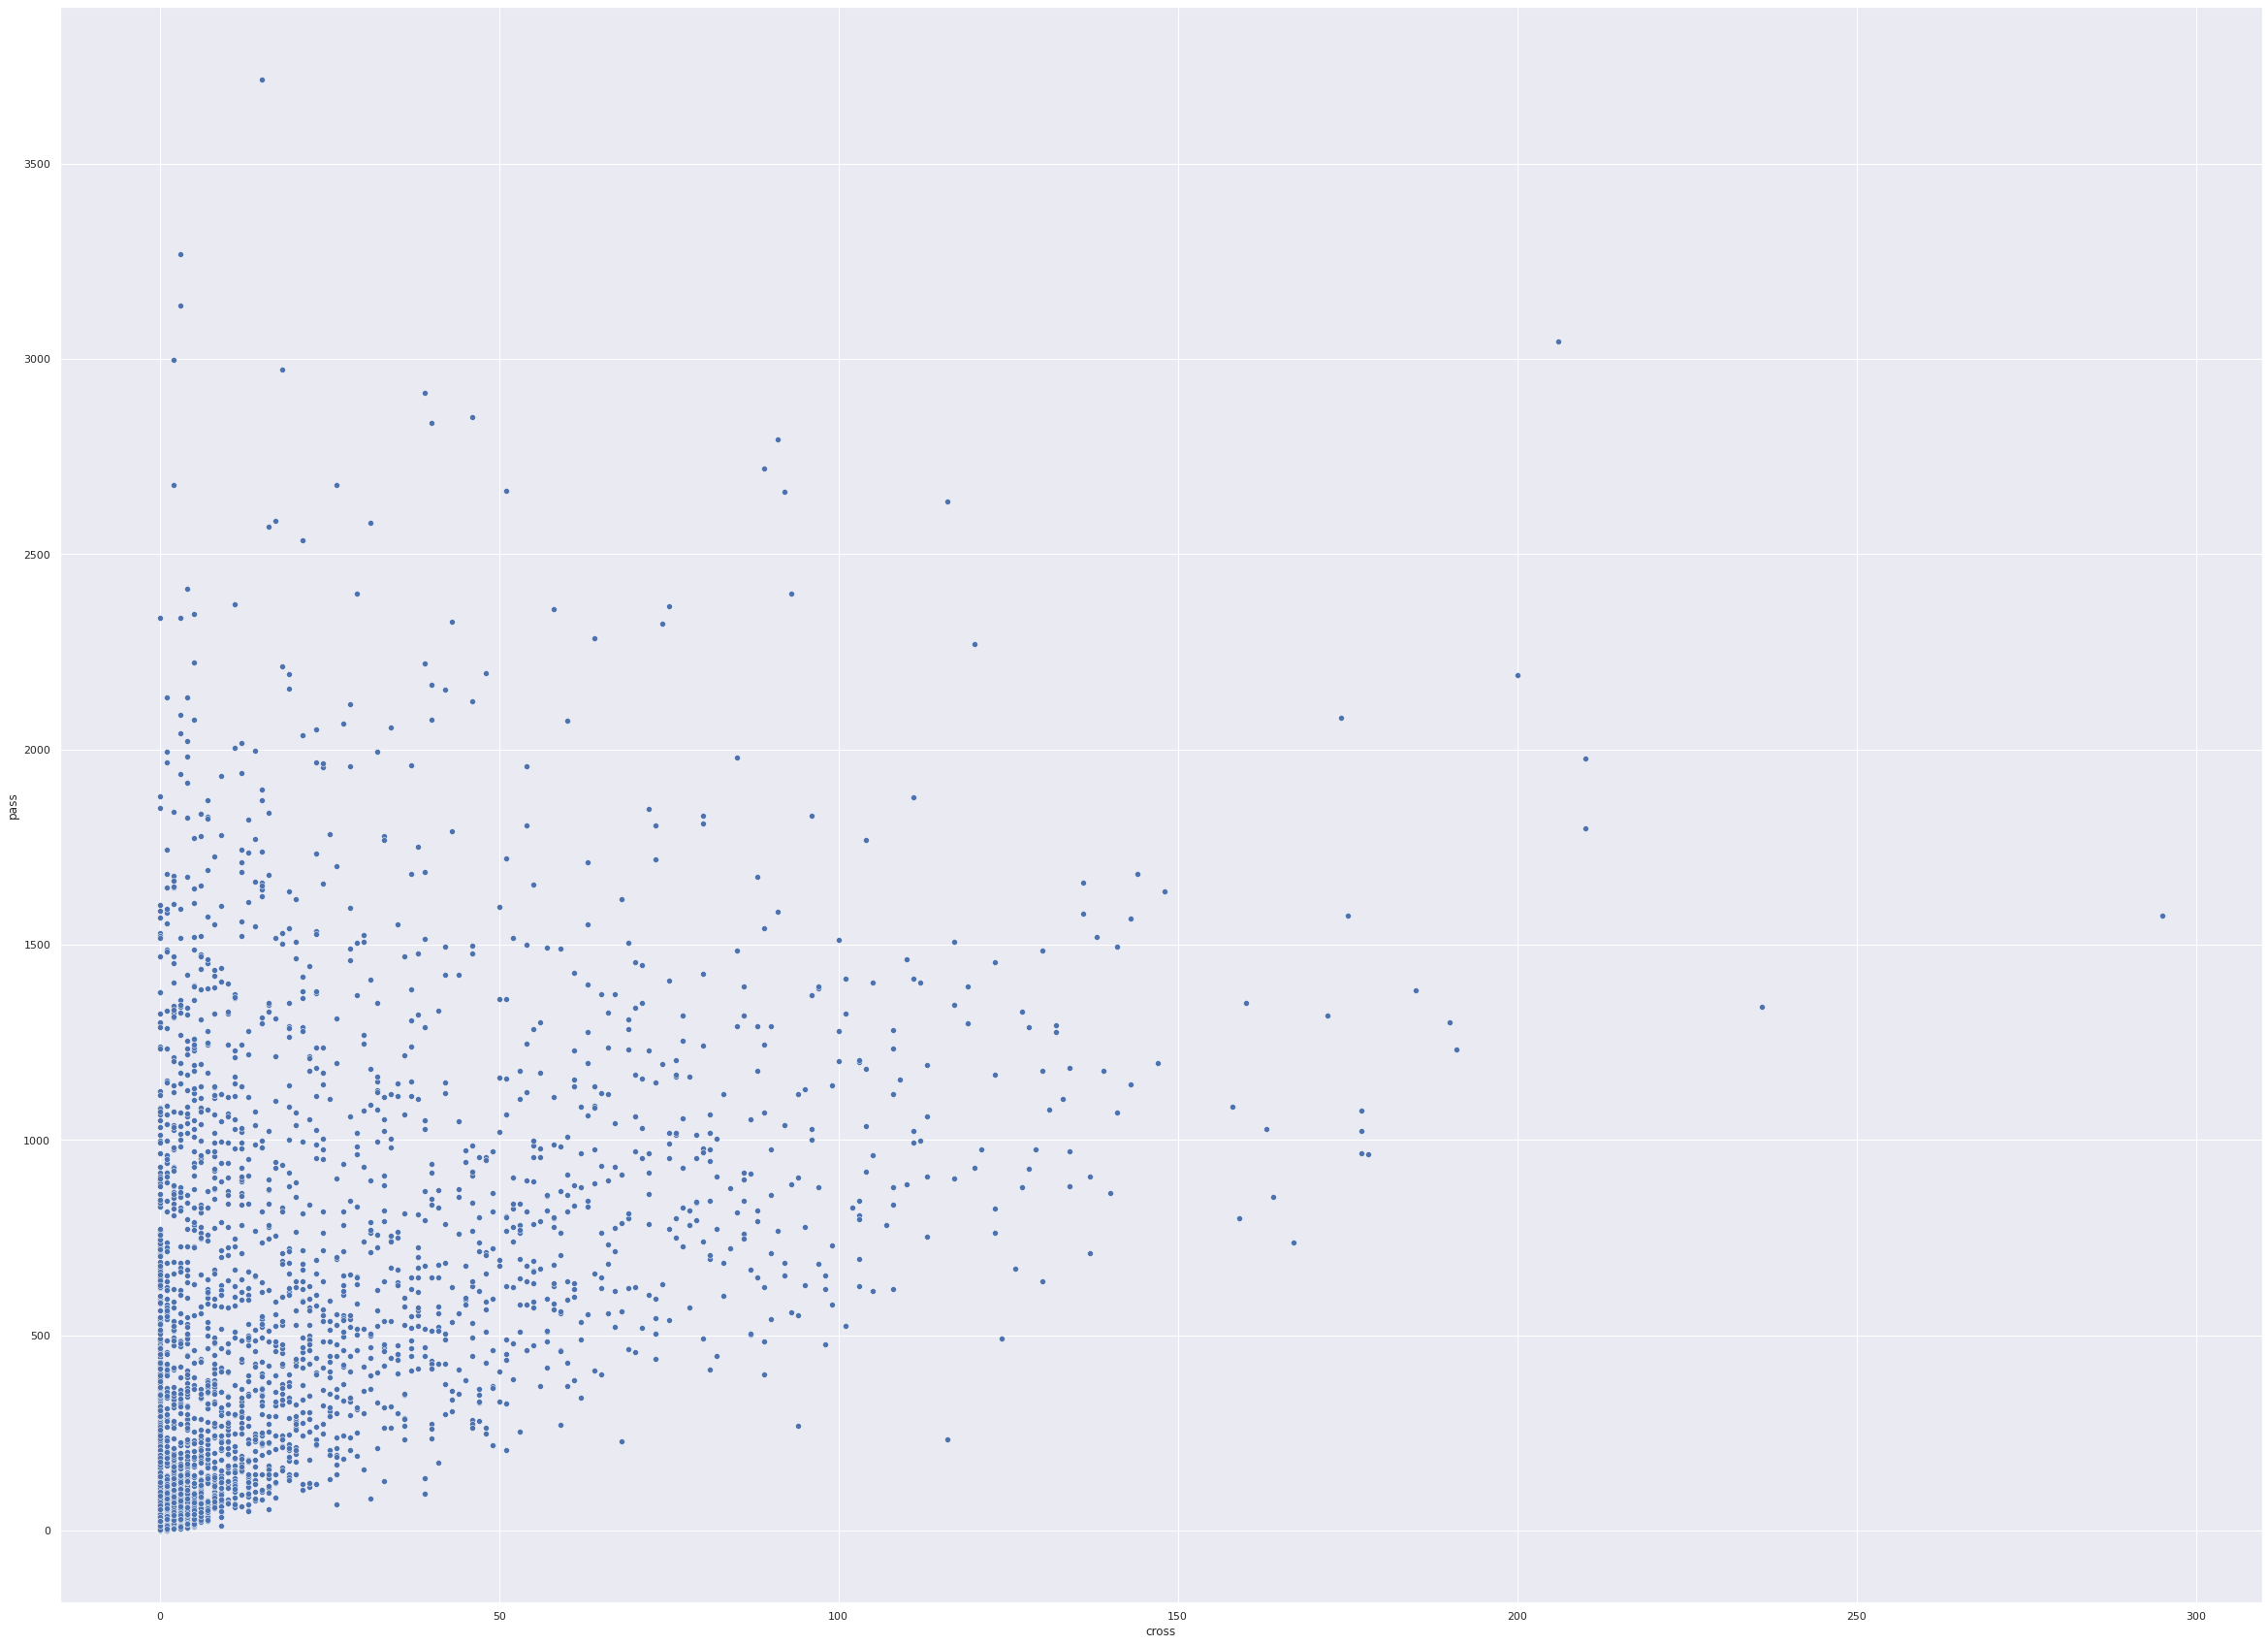

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(40.7,30.27)})
sns.scatterplot(data=df_build_play , y= "pass", x="cross")

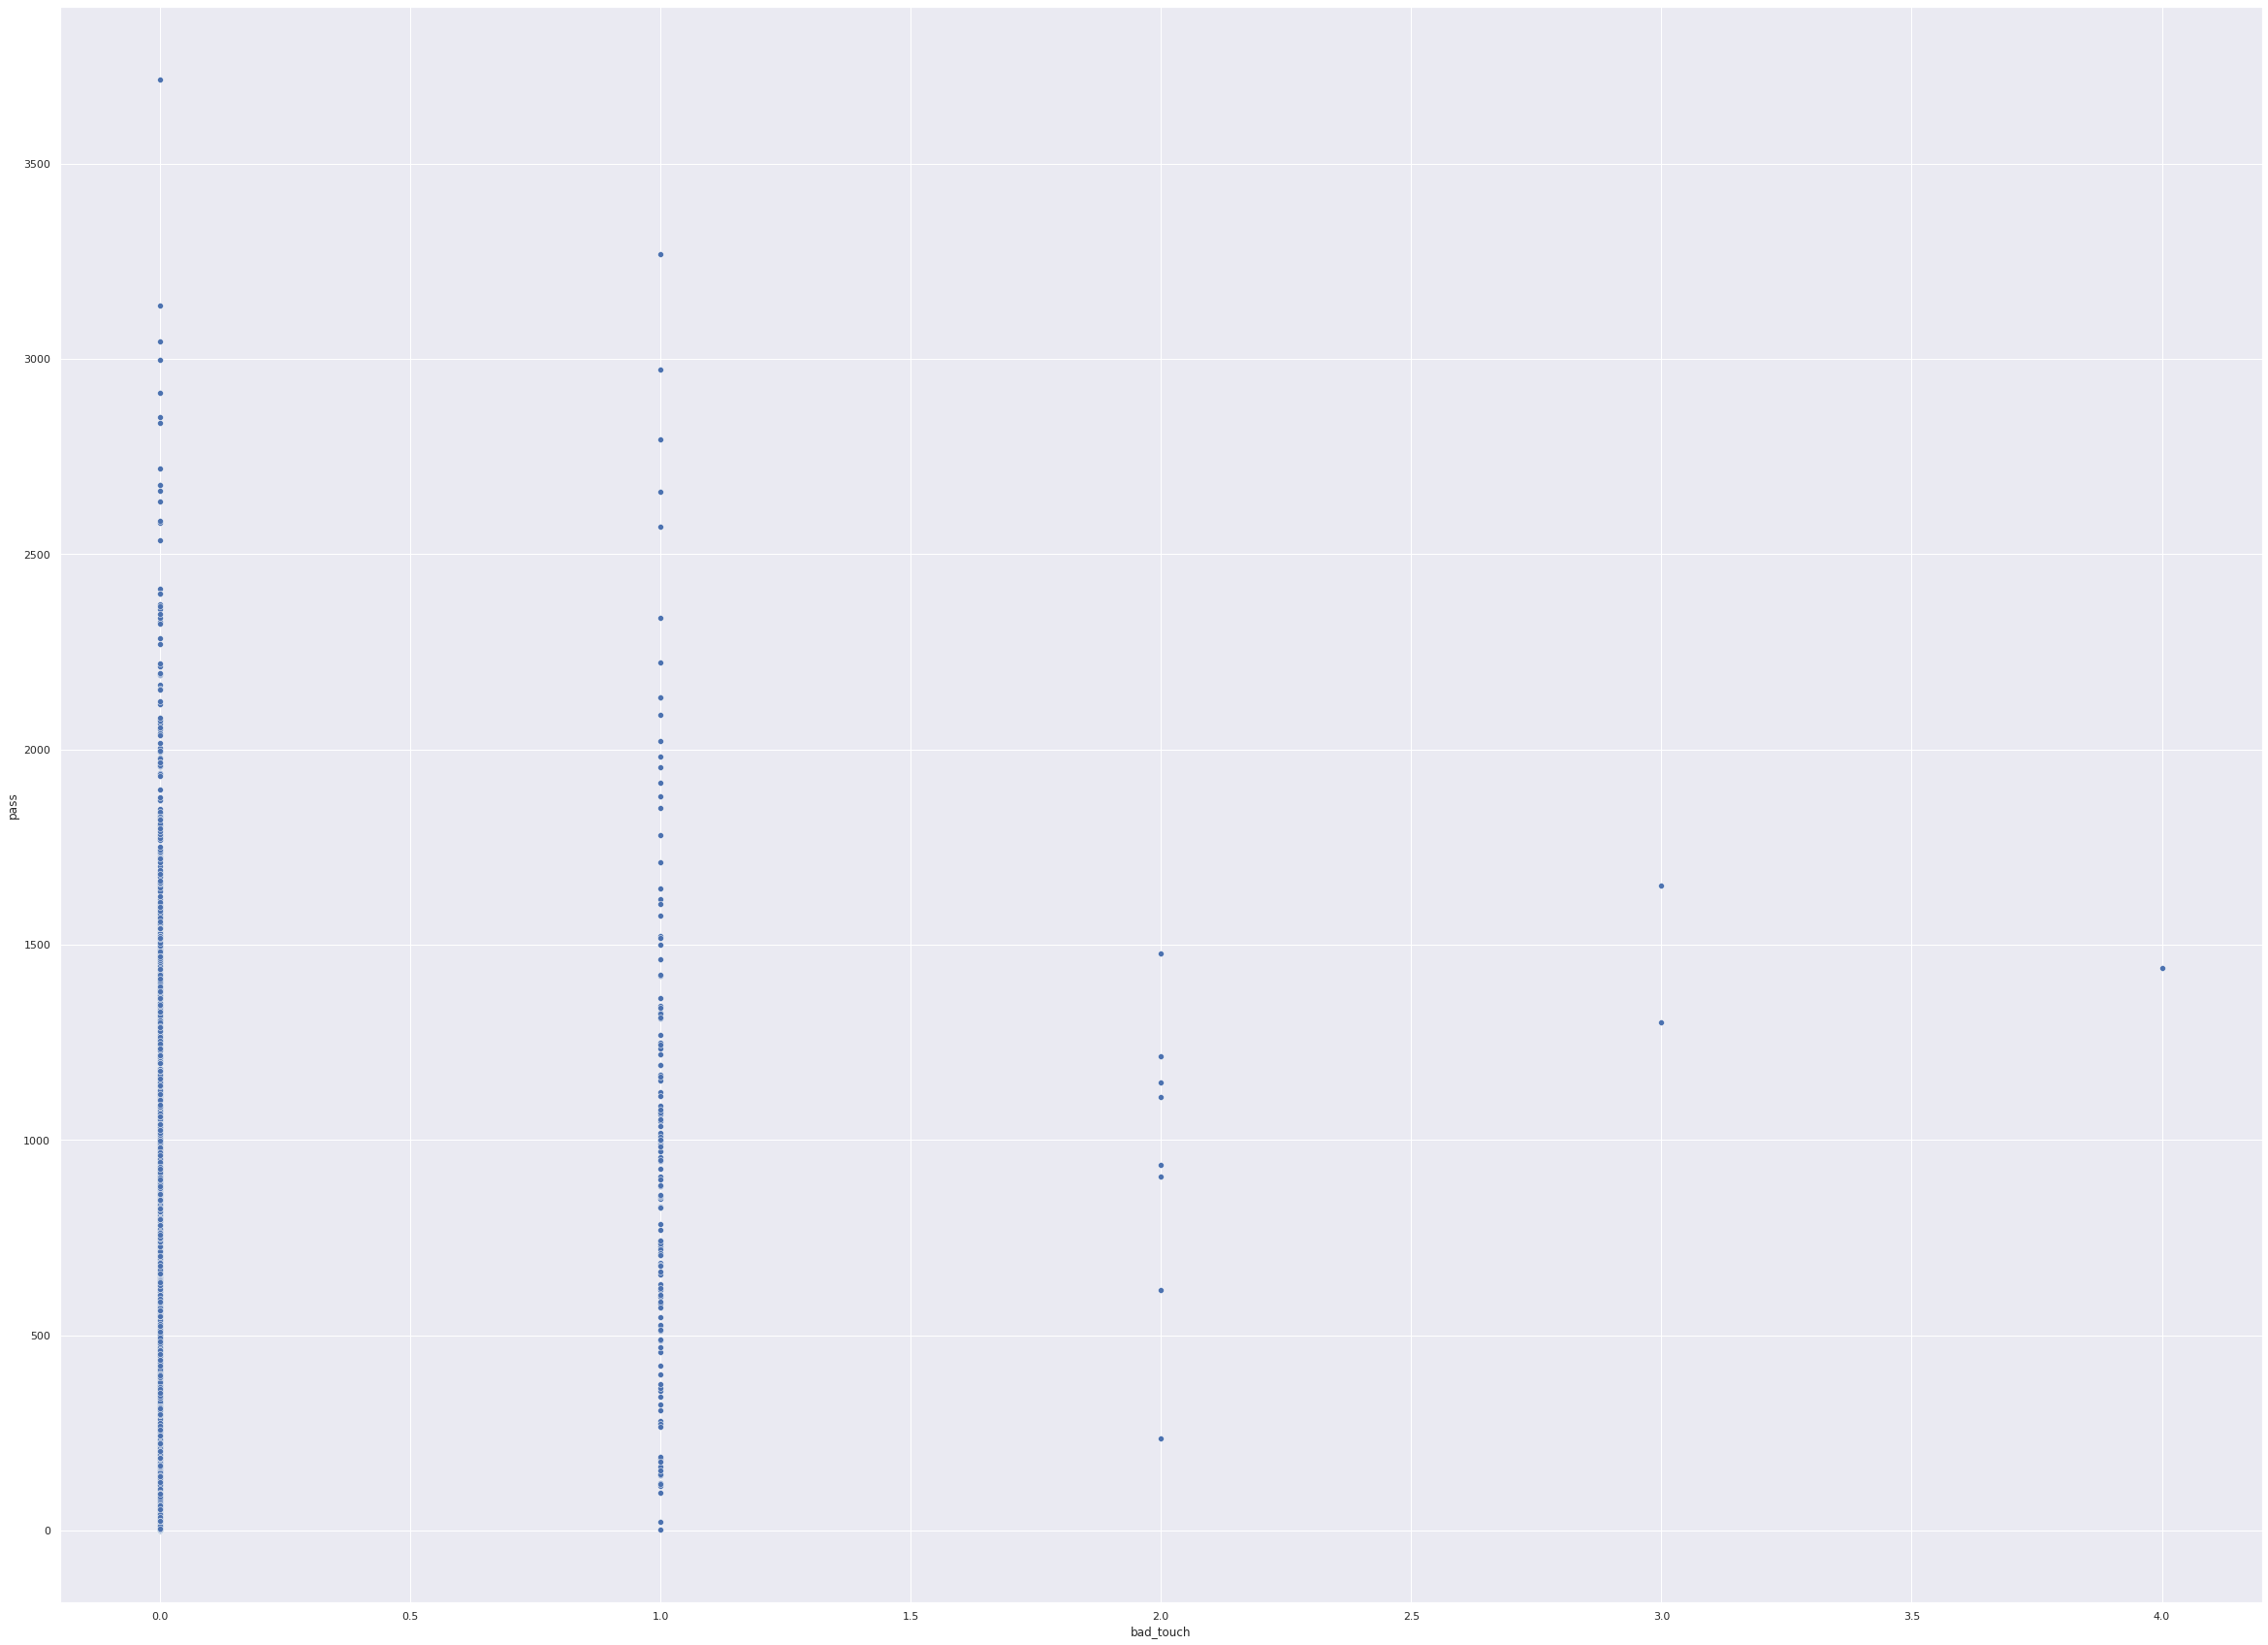

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(40.7,30.27)})
sns.scatterplot(data=df_build_play , y= "pass", x="bad_touch")

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))


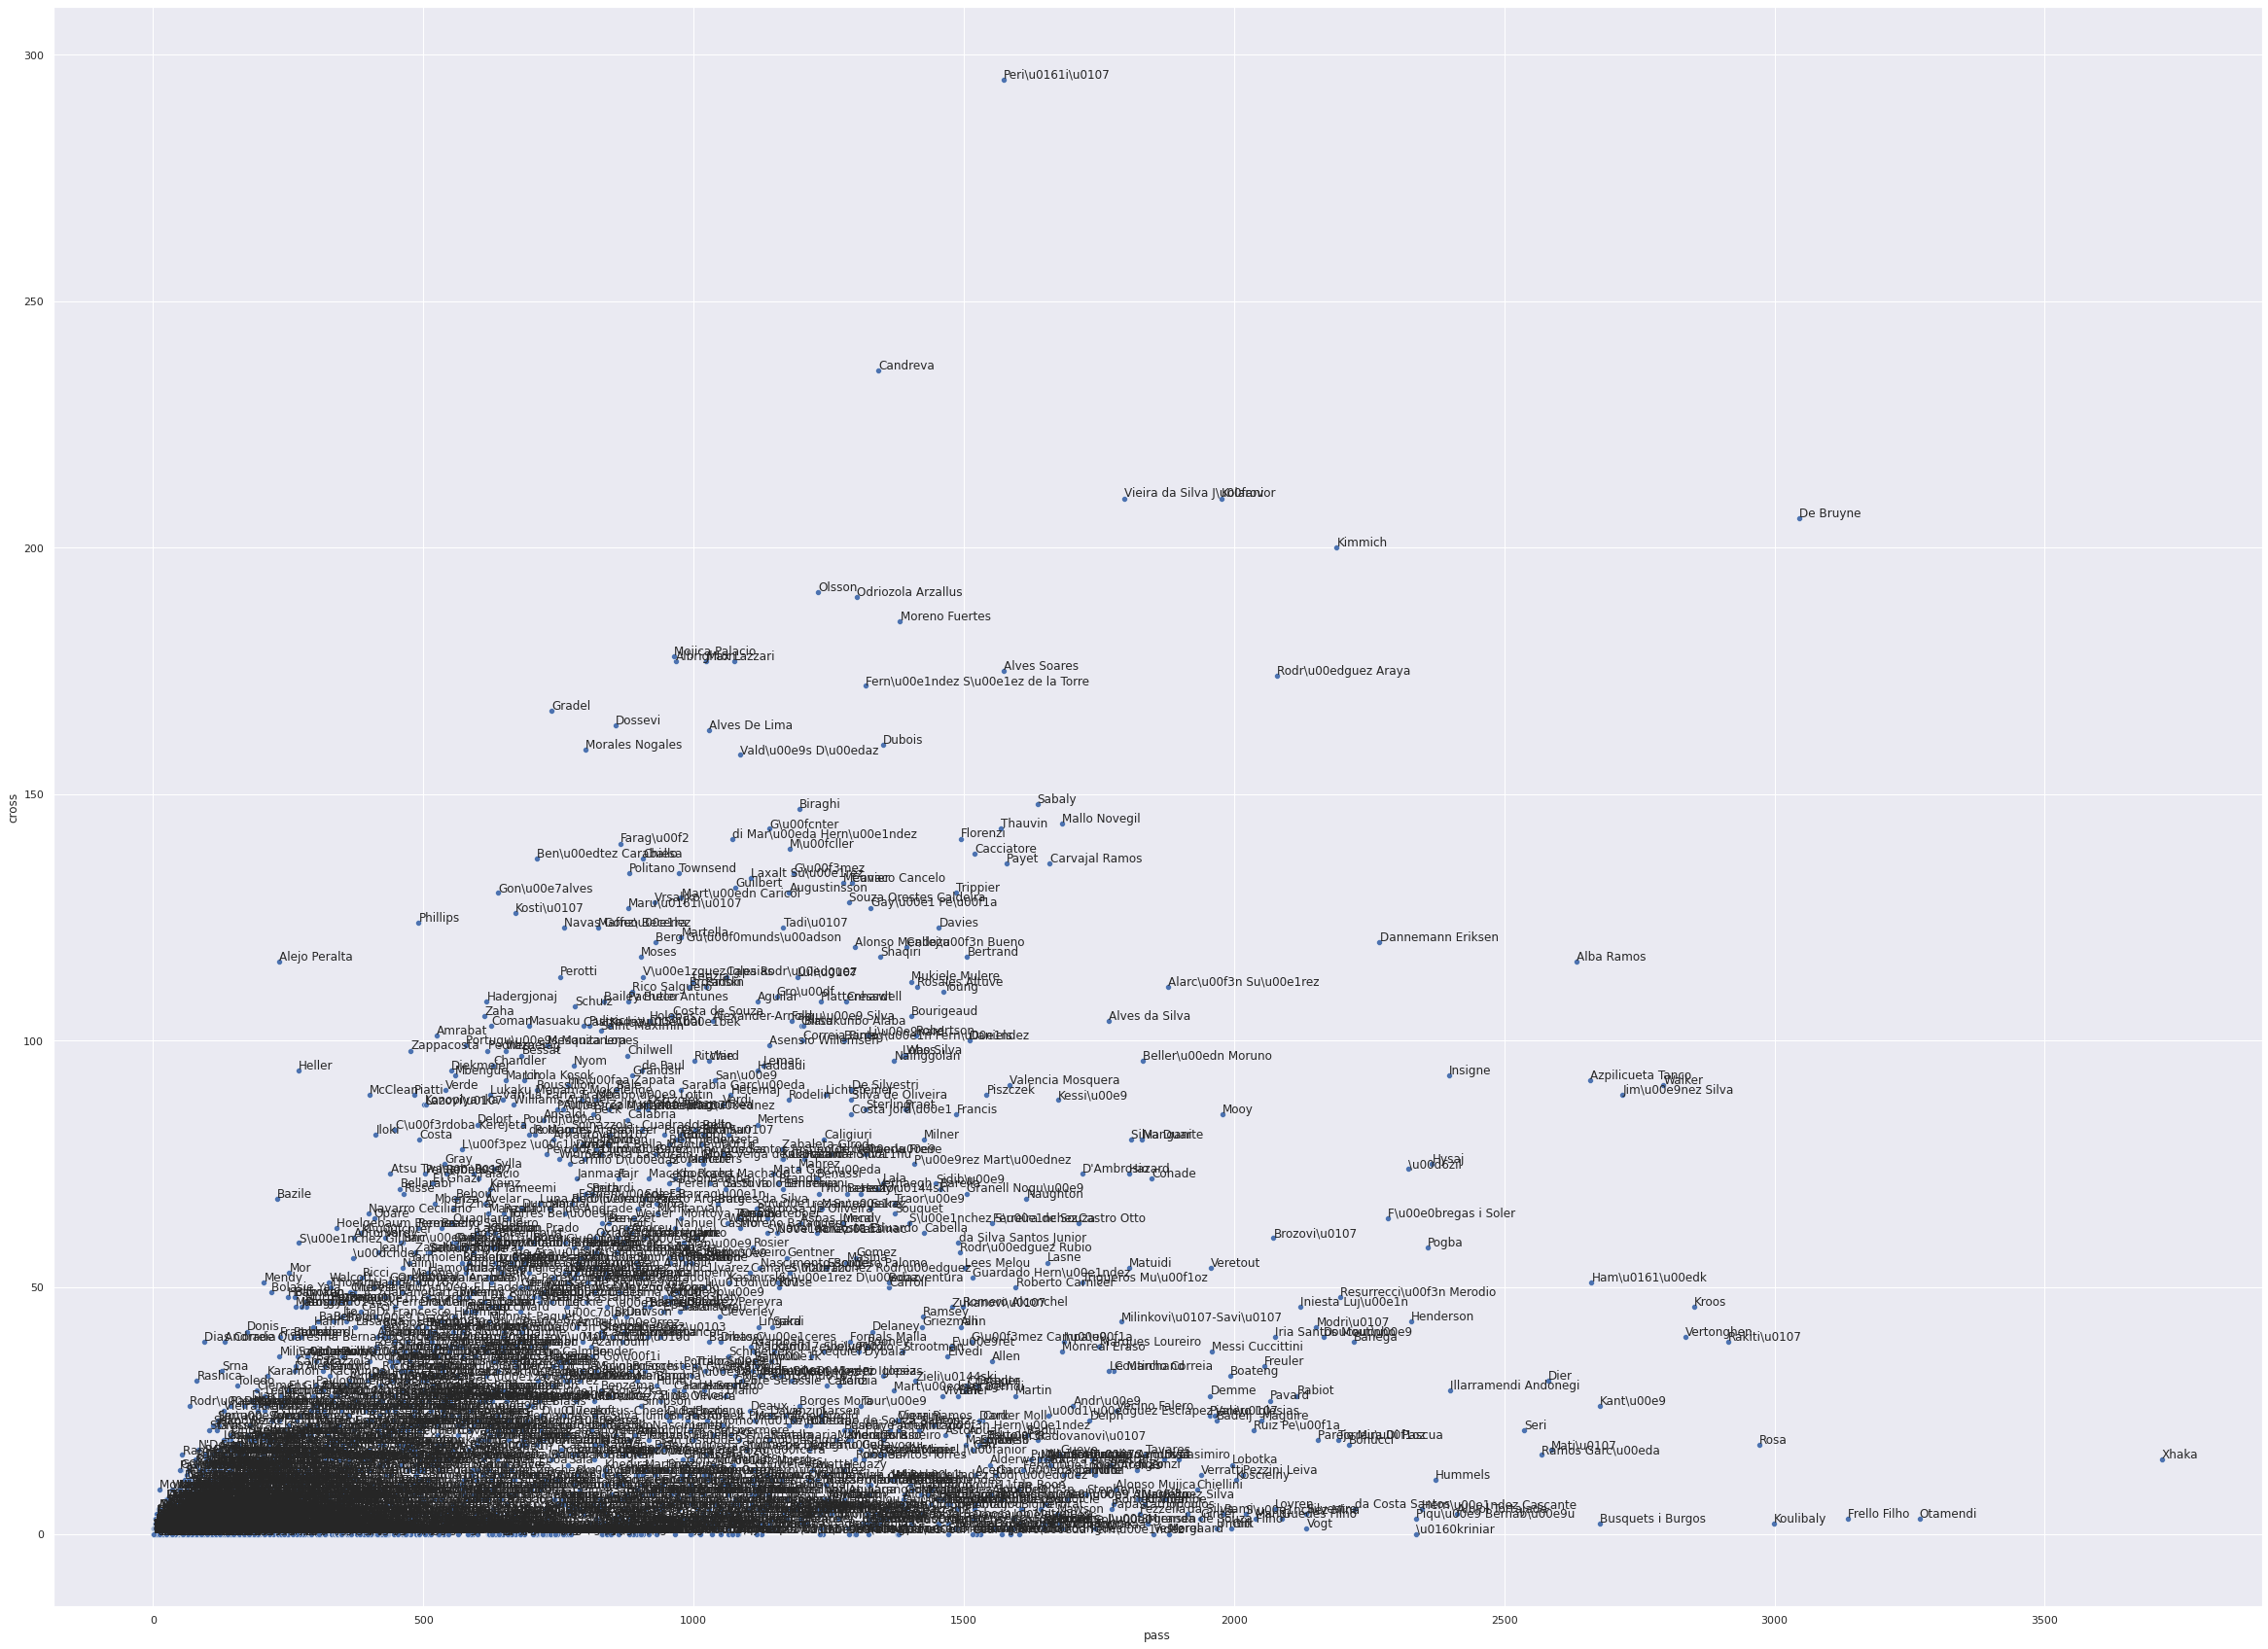

In [ ]:
import seaborn as sns
plt =sns.scatterplot(data=df_build_play , y="cross" , x="pass")
plt_names = df_build_play
for i in range(plt_names.shape[0]):
 plt.text(y=plt_names.cross[i]+0.3,x=plt_names['pass'][i]+0.3,s=plt_names.name[i])

In [ ]:
from sklearn.cluster import KMeans
import numpy as np


def kcluster(data , k):

  kmeans = KMeans(n_clusters=k, random_state=0).fit(data)


  return kmeans.predict(data)


df_build_play

,Unnamed: 0,pass,cross,bad_touch,player_id,name
0,0,645,53,0,9637.0,King
1,1,1107,8,0,8351.0,Surman
2,2,1511,100,0,9285.0,Daniels
3,3,114,1,0,239411.0,Mings
4,4,165,11,0,245813.0,Mousset
...,...,...,...,...,...,...
3023,3023,12,0,0,272829.0,Cheshmi
3024,3024,4,1,0,285590.0,Amrabat
3025,3025,24,0,0,11270.0,Morsy
3026,3026,55,0,0,122651.0,Hawsawi


In [ ]:
df_build_play_res = df_build_play[["player_id",'pass' , 'cross']]
df_build_play["class"] = kcluster(df_build_play_res , 5)
df_build_play.head()
df_build_play.to_csv("/content/drive/MyDrive/turk/database/play_make.csv")


In [ ]:
import seaborn as sns
def plot_result(data,y,x,palette, name=True,hue='class'):
  plt =sns.scatterplot(data=data , y=y , x=x , hue=hue, palette=palette)
  plt_names = df_build_play
  for i in range(plt_names.shape[0]):
    plt.text(y=plt_names[y][i]+0.3,x=plt_names[x][i]+0.3,s=plt_names['name'][i])

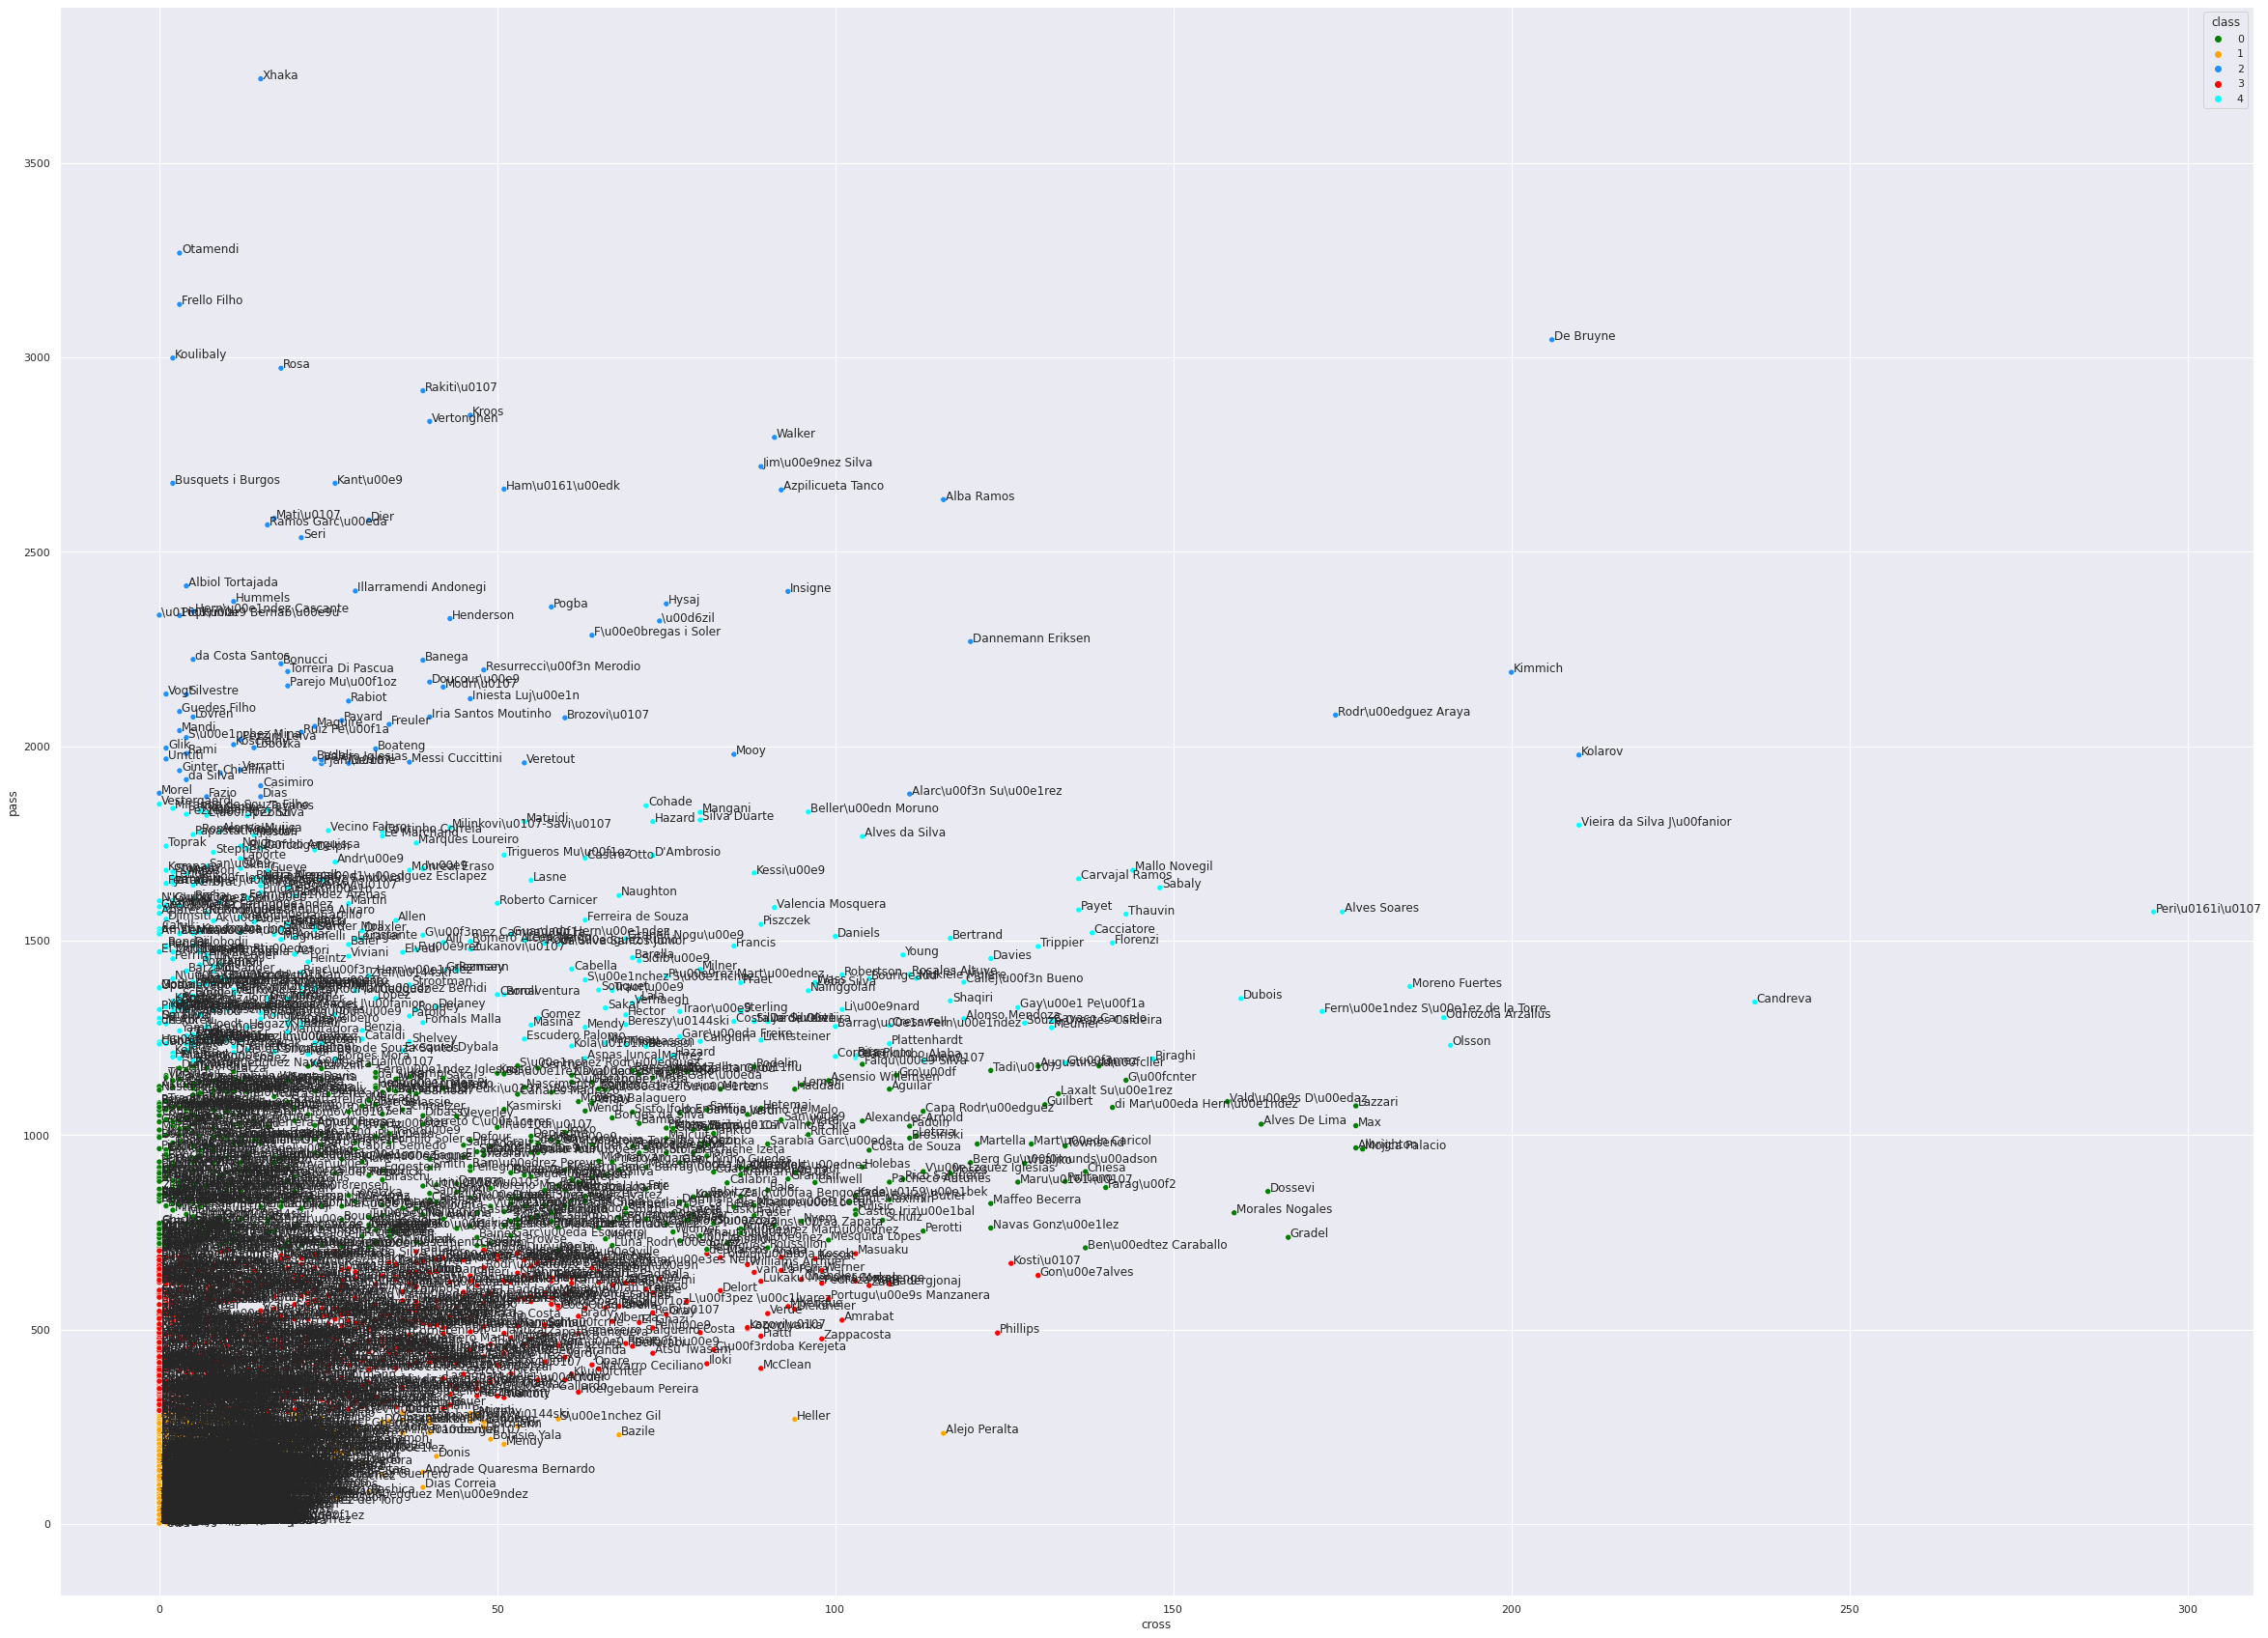

In [ ]:
plot_result(df_build_play,'pass','cross',['green','orange','dodgerblue','red','cyan'])

In [ ]:
import pandas as pd
actions_dist = pd.read_csv("/content/drive/MyDrive/turk/action_dist.csv")
actions_dist.head()

,Unnamed: 0,player_id,action_distance,type_name
0,0,9637,11.036757,pass
1,1,8351,20.427004,pass
2,2,9285,13.213629,pass
3,3,239411,36.775156,pass
4,4,9637,8.590838,pass


In [ ]:
actions_pass= actions_dist.loc[(actions_dist["type_name"]=="pass") | (actions_dist["type_name"]=="cross") ]

In [ ]:
cols =["pass_count",	"pass_mean",	"pass_std",	"pass_75%","cross_count",	"cross_mean",	"cross_std",	"cross_75%"]
data_set  =pd.DataFrame(columns=cols)

def process(player_id):
  global groups , data_set

  cross =groups[["count"
  ,	"mean",	"std",	"75%"]].loc[(groups["player_id"]==player_id)&(groups["type_name"]=="cross")].values
  pass_ =groups[["count"
  ,	"mean",	"std",	"75%"]].loc[(groups["player_id"]==player_id)&(groups["type_name"]=="pass")].values



  if pass_.shape[0]==0:
    pass_count,	pass_mean,	pass_std,	pass_75 = pass_
  else:
    pass_count,	pass_mean,	pass_std,	pass_75 = pass_[0]
  try:
    if cross.shape[0]==0:
      cross_count,	cross_mean,	cross_std,	cross_75 =cross
    else:
      cross_count,	cross_mean,	cross_std,	cross_75 =cross[0]
  except ValueError:
    cross_count,	cross_mean,	cross_std,	cross_75 =[0,0,0,0]


  row ={"player_id":player_id ,"pass_count":pass_count,	"pass_mean":pass_mean,
        "pass_std":pass_std,	"pass_75%":pass_75,
        "cross_count":cross_count,	"cross_mean":cross_mean,
        "cross_std":cross_std,
        "cross_75%":cross_75

        }
  data_set = data_set.append(row,ignore_index=True)







In [ ]:
import tqdm
groups = actions_pass.groupby(["player_id","type_name"]).action_distance.describe().reset_index()
players= groups.player_id.unique()
for player in tqdm.tqdm(players):
  process(player)
data_set.head()
# groups.loc[(groups["player_id"]==0)&(groups["type_name"]=="pass")]

100%|██████████| 3029/3029 [00:13<00:00, 232.20it/s]


,pass_count,pass_mean,pass_std,pass_75%,cross_count,cross_mean,cross_std,cross_75%,player_id
0,257.0,33.282138,31.862021,55.393575,3.0,13.698234,21.251090,20.547352,0.0
1,64.0,23.361915,15.064097,30.925417,0.0,0.000000,0.000000,0.000000,12.0
2,20.0,26.853307,11.834785,34.348991,0.0,0.000000,0.000000,0.000000,33.0
3,1548.0,23.530011,13.110174,29.051242,14.0,26.698567,10.790239,32.774310,36.0
4,219.0,19.299362,11.980440,22.858403,15.0,22.079011,22.616867,29.437290,38.0


In [ ]:
data_set  = data_set.fillna(0)
data_set.isnull().values.any()

False

In [ ]:
data =data_set[["pass_count"	,"pass_mean"	,"pass_std"	,"pass_75%"	,"cross_count"	,"cross_mean"	,"cross_std"	,"cross_75%"]].values
data_set["class"]= kcluster(data , 5)
data_set.head()

NameError: ignored

KeyError: ignored

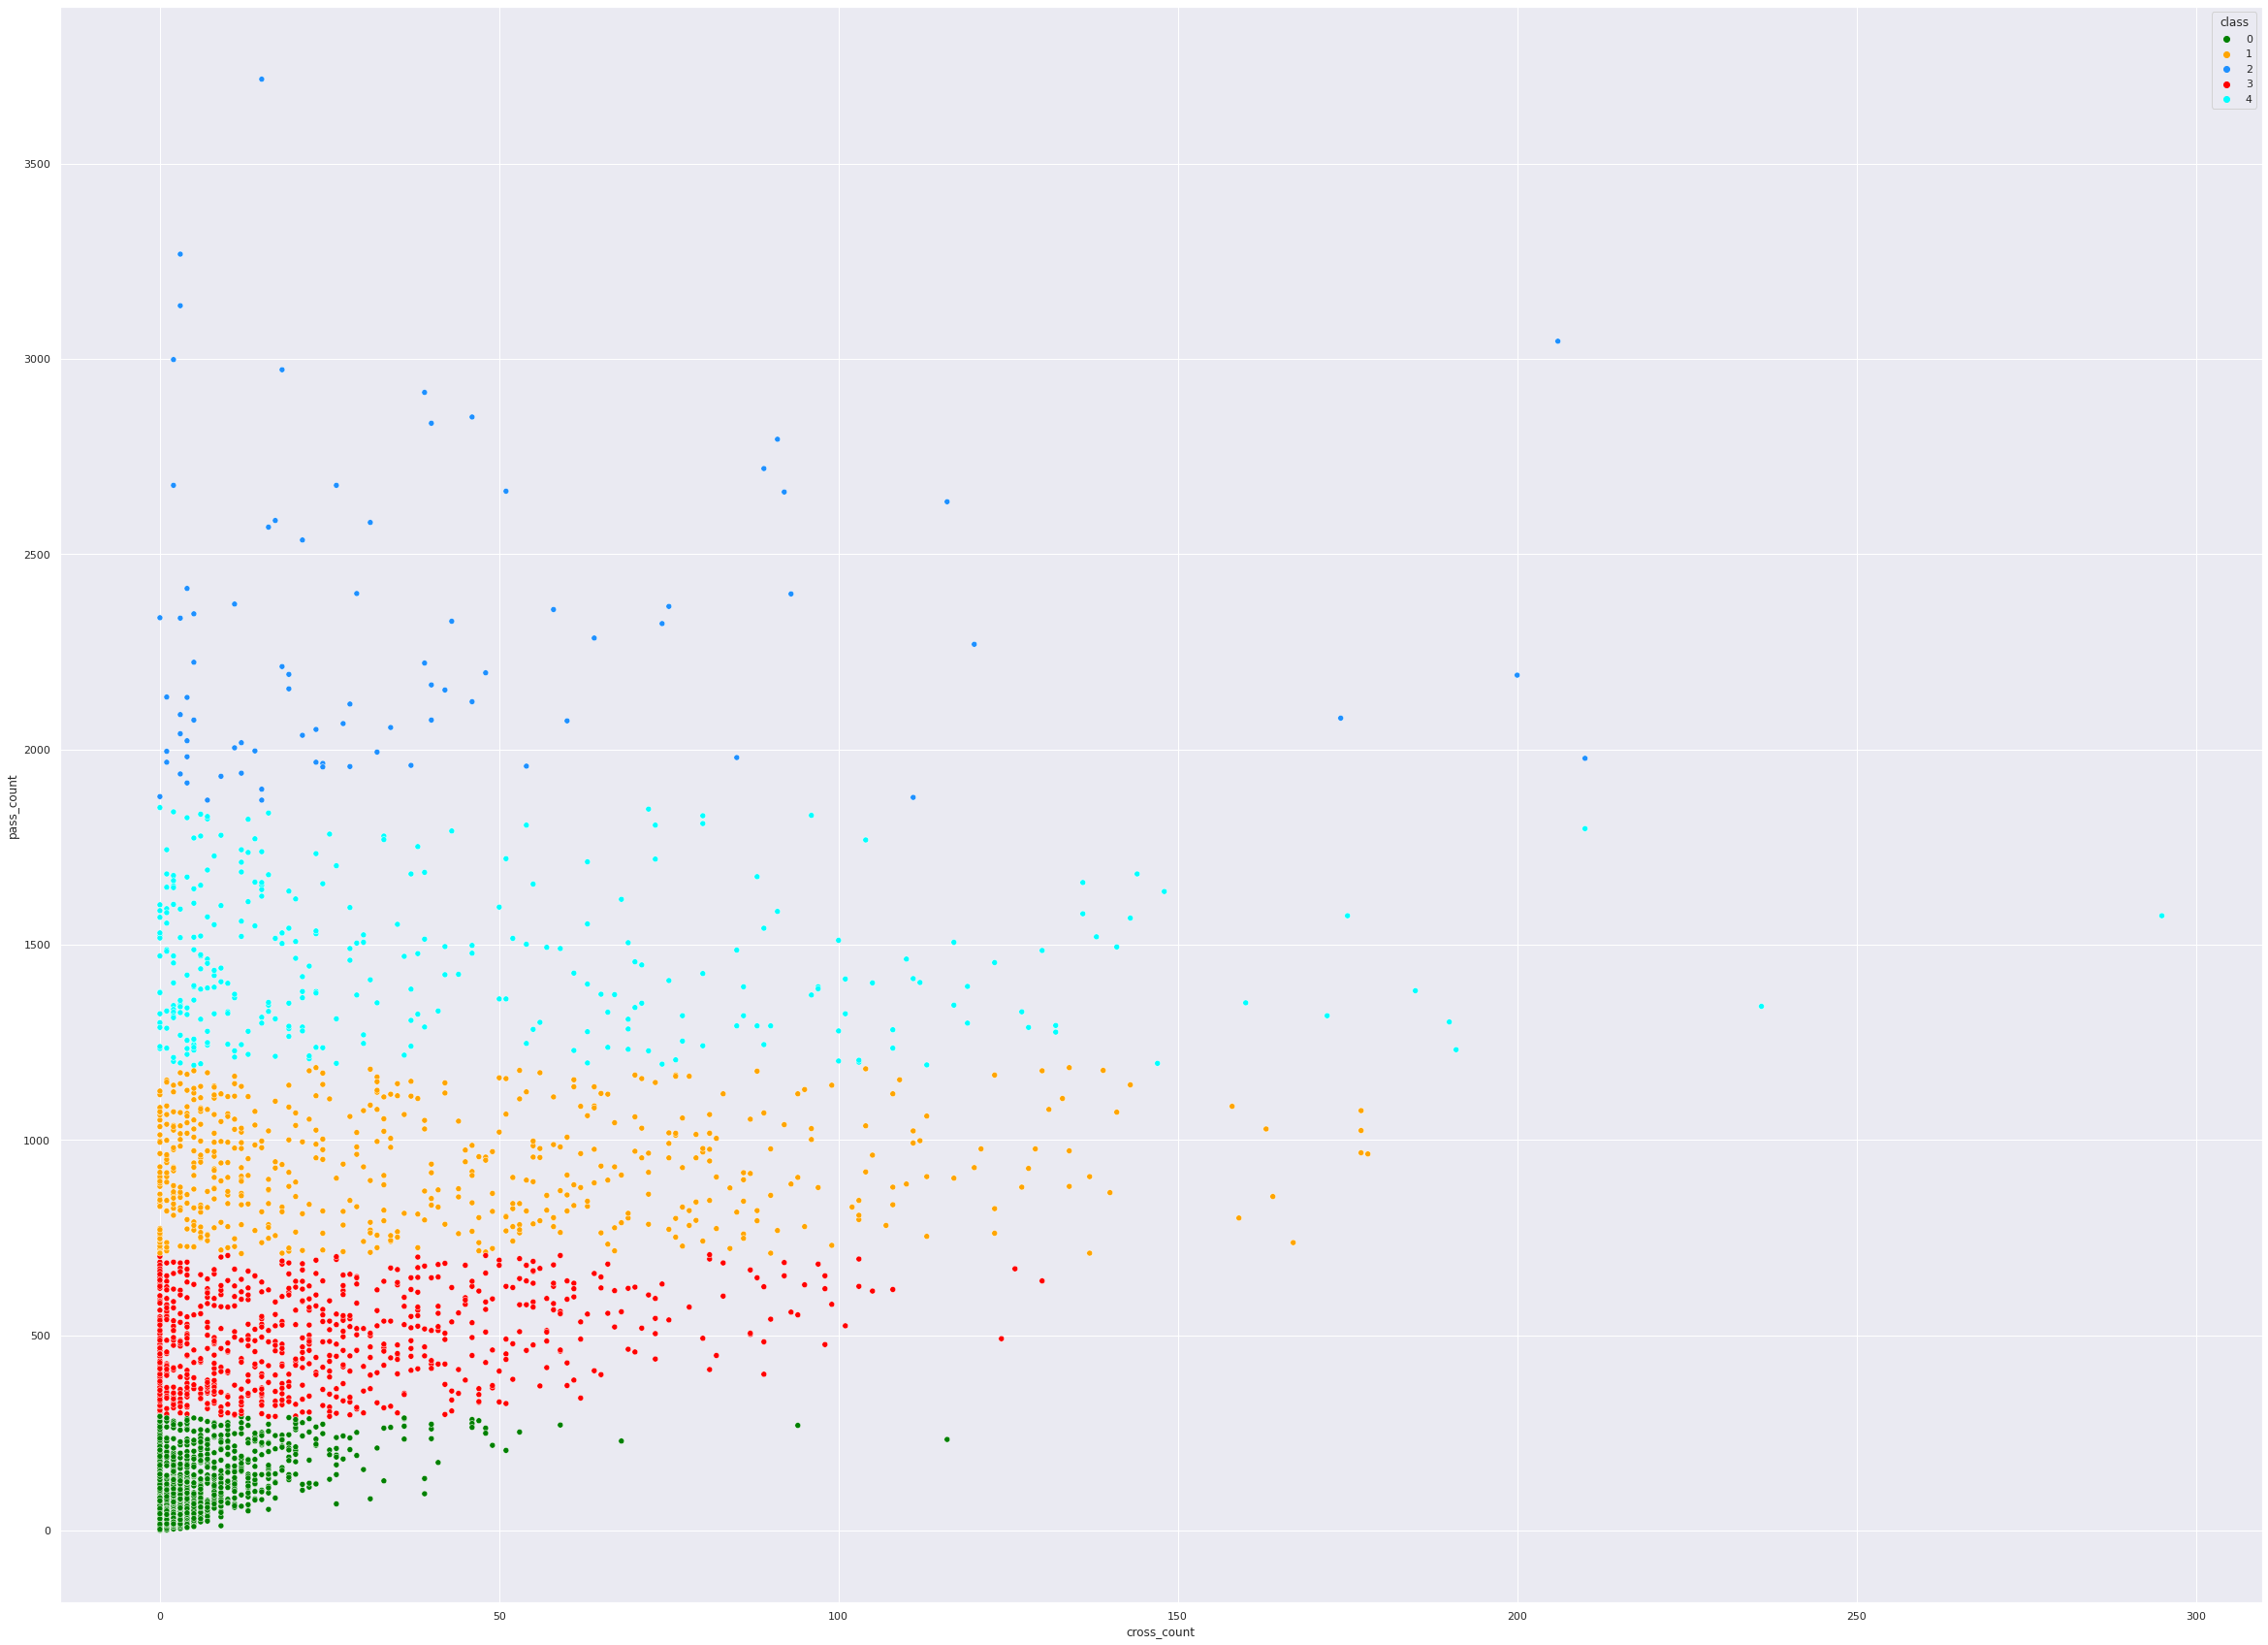

In [ ]:
plot_result(data_set,'pass_count','cross_count',['green','orange','dodgerblue','red','cyan'])